### Load the data

1. Load wine data from the two source files winequality-red.xlsx and winequalitywhite.xslx, which you can find in the Data Science repository on Github: https://github.com/datsoftlyngby/dat2024spring-bi/tree/main/data.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import XlsxLoader as xl

red, white = xl.load_paths(["./data/winequality-red.xlsx", "./data/winequality-white.xlsx"])

In [4]:
# Print the head of the red wine data
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Print the head of the white wine data
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


2. Clean the data in both files.

In [6]:
# Check the structure of both dataframes
red.info()
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

In [9]:
# Last cell showed no missing values, but we can double check
print("\n--- Red Wine ---")
print(red.isnull().sum())

print("\n--- White Wine ---")
print(white.isnull().sum())


--- Red Wine ---
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

--- White Wine ---
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


While querying the data, no datatype inconsistencies or null values are found. A last check,  which could be done, is checking for extremes.

If any extremes are in the data, they'll show when making data visualisation.

3. Aggregate the two files in one still keeping the identity of each wine type - “red” or “white”.

In [11]:
# Add `wine_type` column to `red` with value 1
# Add `wine_type` column to `white` with value 0
red["wine_type"] = 1
white["wine_type"] = 0

# By adding the `wine_type` we can combine the dataframes while keeping the type clear. We could call the types red and white, but non-numeric values are harder to work with.

# Combine the dataframes
wines = pd.concat([red, white])

# Print the head and tail of the combined dataframe
print("--- Combined Data ---")
print(wines.head())
print(wines.tail())

--- Combined Data ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  wine_type  
0      9.4        5          1 

In [12]:
# Just to be sure, take a sample of the data
print("\n--- Random Sample ---")
wines.sample(10)


--- Random Sample ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
4640,6.0,0.240,0.41,1.30,0.036,42.0,118.0,0.99018,3.04,0.64,11.75,6,0
1888,7.2,0.240,0.40,17.85,0.049,50.0,185.0,1.00000,3.34,0.42,9.60,5,0
4191,7.8,0.270,0.35,1.20,0.050,36.0,140.0,0.99138,3.09,0.45,11.20,5,0
975,7.2,0.410,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.40,5,1
216,8.7,0.625,0.16,2.00,0.101,13.0,49.0,0.99620,3.14,0.57,11.00,5,1
1587,5.8,0.610,0.11,1.80,0.066,18.0,28.0,0.99483,3.55,0.66,10.90,6,1
2910,6.1,0.370,0.20,7.60,0.031,49.0,170.0,0.99558,3.22,0.48,9.50,5,0
3645,5.9,0.180,0.28,5.10,0.039,50.0,139.0,0.99165,3.16,0.44,11.30,6,0
1632,7.1,0.280,0.49,6.50,0.041,28.0,111.0,0.99260,3.41,0.58,12.20,8,0
4577,6.3,0.150,0.34,11.40,0.050,25.0,96.0,0.99754,3.21,0.49,10.00,6,0


### Explore the data

4. Explore the features of the original and the new files:
 - number of rows and columns
 - type of data in each column


In [16]:
numberOfRowsRed = red.shape
numberOfRowsWhite = white.shape
numberOfRowsCombined = wines.shape

print(f"\nNumber of rows in red: {numberOfRowsRed}")
print(f"Number of rows in white: {numberOfRowsWhite}")
print(f"Number of rows in combined: {numberOfRowsCombined}")

print(f"\nTypes in red: \n {red.dtypes}")
print(f"\nTypes in white: \n {white.dtypes}")
print(f"\nTypes in combined: \n {wines.dtypes}")


Number of rows in red: (1599, 13)
Number of rows in white: (4898, 13)
Number of rows in combined: (6497, 13)

Types in red: 
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                 int64
dtype: object

Types in white: 
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                 int64
dtype: o

As would be expected, the concatinated dataframe is just an addition of the datatypes and shapes of the old frames.

5. Calculate the descriptive statistics of the numeric data. Is the data normally distributed?


In [17]:
# A simple method for describing the data
# Other methods, like plotting was attempted, but the data is too large to be useful or readable

wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


6. Plot diagrams that visualize the differences in red and white wine samples. Use it as a support for answering the following questions:
    - A. what exactly is shown on the diagrams?
    - B. after seeing it, can you tell which type of wine has higher average quality?
    - C. which type of wine has higher average level of alcohol?
    - D. which one has higher average quantity of residual sugar?


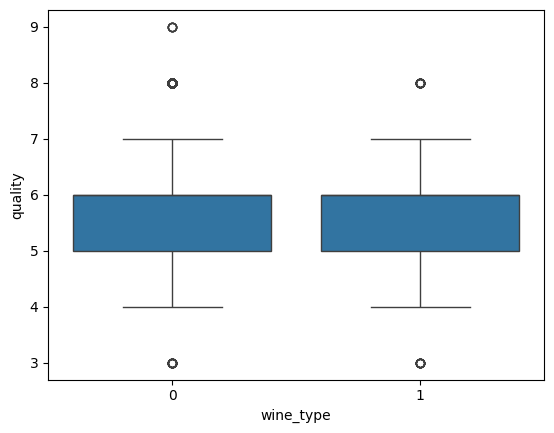

5.87790935075541
5.6360225140712945


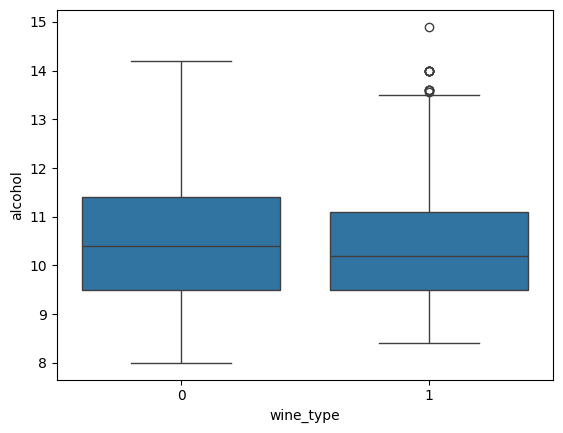

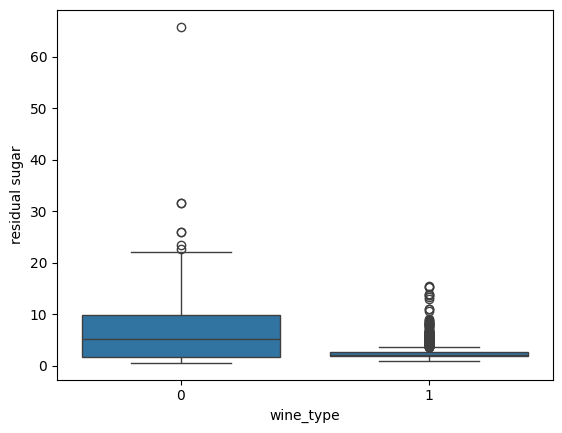

In [58]:
# fig, ax = plt.subplots(1, 2)
# ax[0].hist(red['quality'])
# ax[0].set_title('Red Wine Quality')
# ax[1].hist(white['quality'])
# ax[1].set_title('White Wine Quality')
# plt.show()

# fig, ax = plt.subplots(1, 2)
# ax[0].boxplot(red['alcohol'])
# ax[0].set_title('Red Wine Alcohol')
# ax[1].boxplot(white['alcohol'])
# ax[1].set_title('White Wine Alcohol')
# plt.show()

# fig, ax = plt.subplots(1, 2)
# ax[0].boxplot(red['residual sugar'])
# ax[0].set_title('Red Wine Residual Sugar')
# ax[1].boxplot(white['residual sugar'])
# ax[1].set_title('White Wine Residual Sugar')
# plt.show()

# 0 is white, 1 is red

sns.boxplot(data=wines, x='wine_type', y='quality')
plt.show()
print(white['quality'].mean())
print(red['quality'].mean())

sns.boxplot(data=wines, x='wine_type', y='alcohol')
plt.show()

sns.boxplot(data=wines, x='wine_type', y='residual sugar')
plt.show()

From the first diagram, it can be seen that both wines have very similar quality, with white having a higher maximum. Simply finding the mean of the qualities also reveals a very low difference in the qualities, but also showing that white does have a higher average. 

The second plot also reveals that white wine have a higher average level of alcohol. The correlation between alcohol and quality will be returned to further in the assignment...

The final plot also shows a higher amount of sugar in white wine, and that it is very spread out for red wine. This could potentionally be cleaned up to get better data consistency.

7. Which other questions might be of interest for the wine consumers or distributers?

Other questions could involve:
- What feature of wine gives the best quality?
- What effect does acidity have on the wine?
- If you want to buy "healthier" wine, while getting good quality, what should you look for?

These questions are easier to answer with a heatmap. We'll visit the first question in task 9.

8. Split the aggregated data into five subsets by binning the attribute pH. Identify the subset with
the highest density? What if you split the data in ten subsets?


9. Create a heat map or a correlation matrix of all data and investigate it. Can you tell which vine
attribute has the biggest influence on the wine quality? Which has the lowest?
Do you get the same results when you analyze the red and white wine data sets separately?


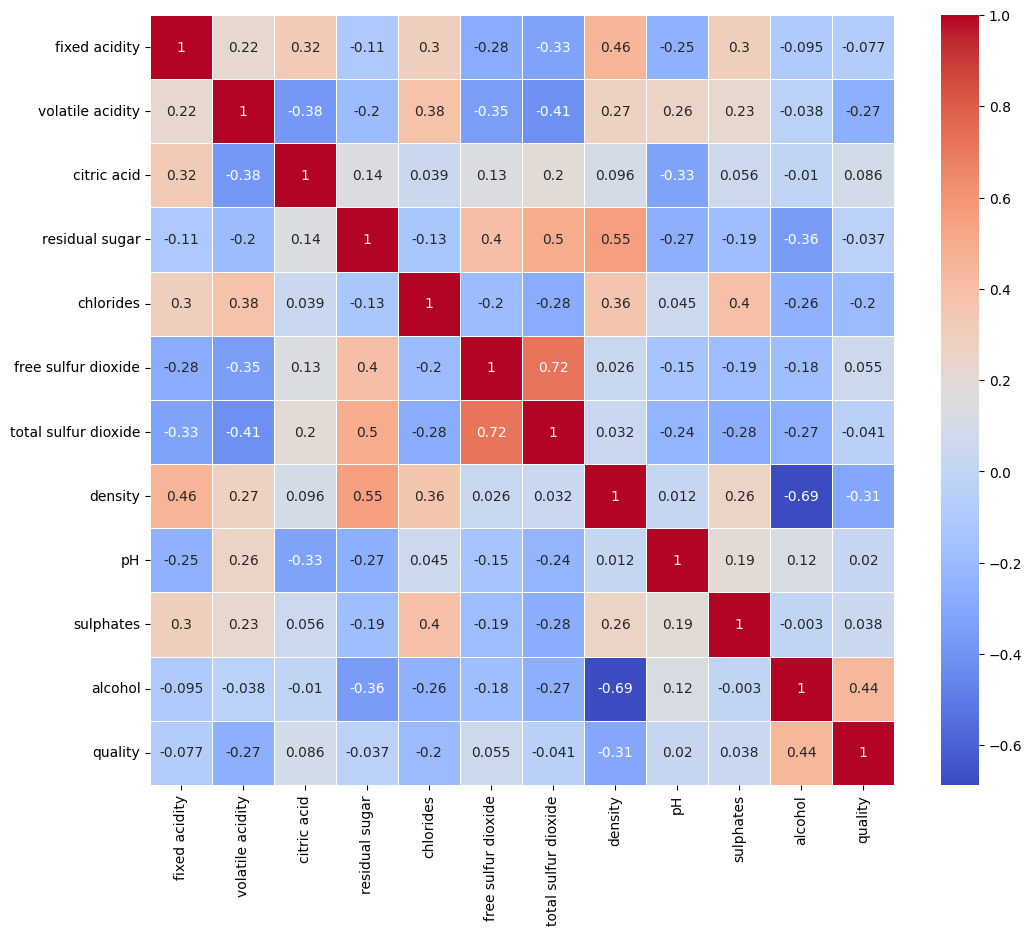

In [28]:
# The quickes way to see the correlation between the different variables is to use a heatmap. This will give us a quick overview of the relationships between the different variables.
plt.figure(figsize=(12, 10))
wines_plot = wines.drop('wine_type', axis=1) # Drop the wine_type column. It's not very useful for this plot, but as it has been made to a numeric value, it could also be shown.
sns.heatmap(wines_plot.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

A heatmap shows the correlation between different coloumns in a dataset (in this case the combination of red and white). The closer the values are to -1 or 1, the higher the correlation.

For the above heatmap, the combined value is used as it is assumed to find a better general analysis for wine, a combined dataset would provide a more fullfilling result, as the quality of both will be added to the chart. Having also for rosé wine would improve the result for general wine quality more.

From the above heatmap, a high correlation (70~) can be found at the following intersections: 
- "alcohol" and "density" with a correlation of 69%
- "total sulfur dioxide" and "free sulfur dioxide" with a correlation of 72%

The biggest correlation with quality is alcohol, but it is not significant at only 44%. As alcohol often serves as a taste enhancer, it seems correct to assume a slight correlation as it would improve the chances of having a higher quality product, assuming quality is measured in "taste".

The lowest correlation with quality is sulphates at 0.03%, meaning there is only a relation in less than 0.03% of samples.